# Variational Inference
For many models of practical interest, evaluating the posterior distribution will be intractable either because of the high dimensionality of the latent space or a complex form of the posterior distribution. For such cases, approximation schemes are handy in deriving a good lower or upper bound on the posterior distribution. The approximation schemes fall into 2 categories - deterministic and stochastic. Stochastic methods involve sampling while deterministic methods are based on analytical approximations to the posterior. In this section, we review variational approximations to the posterior.

Suppose we have a fully Bayesian model with a set of $N$ observed variables $X = \{x_1,x_2,\ldots,x_N \}$ and latent variables $Z = \{z_1,z_2,\ldots,z_N \}$. Assume our model specifies the joint distribution $p(X,Z)$ and our goal is to find an approximation for the conditional $p(Z|X)$ which enables us to make predictions on $X$. We can express the log marginal likelihood of the data as: $ \log {p(X)} = \mathcal{L}(q) + KL(q||p) $ where

$$ \begin{align} \mathcal{L}(q) &= \int {q(Z) \log{\frac{p(X,Z)}{q(Z)}}dZ} \\
KL(q||p) &= \int{q(Z) \log{\frac{p(Z|X)}{q(Z)}}dZ}\end{align}$$

The variational inference proceeds by maximizing the lower bound $\mathcal{L}(q)$ with respect to the distribution $q(Z)$ which is equivalent to minimizing the KL divergence. The KL divergence is minimum (equals 0) when $q(Z) = p(Z|X)$. When the posterior $p(Z|X)$ is intractable, we use a restricted family of distributions for $q(Z)$ and then seek the member of the family that minimizes the KL divergence.


## Factorized Distributions
We restrict the family of distributions that factorize the joint distribution over the latent variables i.e. $q(Z) = \prod_{i=1}^M q_i(Z_i)$
where $M$ denotes the number of disjoint groups of latent variables.

$$ \begin{align} \mathcal{L}(q) &= \int{q(Z) \log{\frac{p(X,Z)}{q(Z)}}dZ} \\
&= \int{\prod_{i=1}^M q_i(Z) \Big( \log{p(X,Z)} - \log{q(Z)} \Big) dZ } \\
&= \int{q_j \Bigg(\int{\log{p(X,Z)} \prod_{i\ne j}^M q_i dZ_i}\Bigg) dZ_j} - \int{q_j \log{q_j} dZ_j } + \text{const.} \\ 
&= \int{q_j \log \tilde{p}(X,Z_j) dZ_j} - \int{q_j \log{q_j} dZ_j } + \text{const.} \end{align}$$
where $\tilde{p}(X,Z_j) = \mathbb{E}_{i\ne j}\left[ \log p(X,Z)\right] + \text{const.}$ representing the expection with respect to the q distributions over all variables $z_i$ for $i \ne j$.

Thus the lower bound $\mathcal{L}(q_j)$ can be maximized by minimizing the KL divergence between $q_j(Z_j)$ and $\tilde{p}(X,Z_j)$. Thus we obtain $\log{q_j^*(Z_j)} = \mathbb{E}_{i\ne j}\left[ \log p(X,Z)\right] + \text{const.}$

We determine the optimal solution over all the $z_j$ by initializing all the factors $q_j(Z_j)$ and then cycling through the factors replacing each in turn with a revised estimate given the right hand side of the above equation. We can ignore the constant term as it serves to normalize the distribution. Convergence is guaranteed because the bound is convex with respect to each of the factors $q_j(Z_j)$.

## Example

This is an example to demonstrate the variational approximation  and adapted from Figure 4.14 in [1]. This is also the same example used to demonstrate the Laplace approximation.

Suppose $p(z) \propto \sigma(20z+4) \exp{\left(\frac{-z^2}{2}\right)}$ where $\sigma(\cdot)$ is the sigmoid function. This form is very common in classification problems and serves as a good practical example.

This is a distribution on a scalar random variable $z$ and we seek to approximate it with a Gaussian. The parameters for Gaussian distributions will be determined by variational approximation. To initialize, we introduce conjugate prior distributions for the mean $\mu$ and precision $\tau$ given by:

$$ \begin{align} p(\tau) &= \text{Gam}(\tau|a_0,b_0) \\
p(\mu|\tau)  &= \mathcal{N}(\mu|\mu_0,(\lambda_0 \tau)^{-1})\end{align}$$

We assume the posterior $q(\mu,\tau)$ factorizes as: $q(\mu,\tau) = q_{\mu}(\mu) \cdot q_{\tau}(\tau)$.

$$ \begin{align} \mathcal{L}(q) &= \int{q(Z) \ln\left\{\frac{p(X,Z)}{q(Z)}\right\}dZ} \\
&= \int{q_{\mu} q_{\tau} \ln\left\{\frac{p(X|\mu,\tau) \cdot p(\mu|\tau) \cdot p(\tau)}{q_{\mu} q_{\tau}}\right\}dZ}  \end{align}$$


### Optimal distribution for $\mu$
$$\begin{align}\Rightarrow \mathcal{L}(q_{\mu}) &= \int{q_{\mu} \int{q_{\tau} \log{\left[p(X|\mu,\tau) \cdot p(\mu|\tau) \cdot p(\tau)\right]}d\tau } d\mu} - \int q_{\mu} \log{q_{\mu}} d\mu - \int q_{\tau} \log{q_{\tau}} d\tau\\ 
&= \int{q_{\mu} \int{q_{\tau} \log{\left[p(X|\mu,\tau) \cdot p(\mu|\tau) \right] }d\tau} d\mu} - \int q_{\mu} \log{q_{\mu}} d\mu - \int q_{\tau} \log{q_{\tau}} d\tau + \int{q_{\mu} q_{\tau} \log{p(\tau)}}d\tau d\mu\\
&= \int{q_{\mu} \int{q_{\tau} \log{\left[p(X|\mu,\tau) \cdot p(\mu|\tau) \right] }d\tau} d\mu} - \int q_{\mu} \log{q_{\mu}} d\mu + \text{const.}\end{align}$$

The lower bound can be maximized by maximizing the right hand side. The right hand side is also the negative KL divergence $ KL(q_{\mu}||\mathbb{E}_{\tau} \left[p(X|\mu,\tau) \cdot p(\mu|\tau)\right])$

The factorized distribution assumption above implies that $p(\mu|\tau) = p(\mu)$, we can further simplify the above expression as follows:

$$ \log q^*_{\mu} = \mathbb{E}_{\tau} \log \left[p(X|\mu,\tau) \cdot q(\mu) \right]) + \text{const.}  $$
The optimum factors can be obtained as follows:

$$ \begin{align} \log{q_{\mu}^*(\mu)} &= \mathbb{E}_{\tau} \left[-\frac{\tau}{2} \sum_{n=1}^N (x_n-\mu)^2 - \frac{\lambda_0 \tau}{2} (\mu-\mu_0)^2  \right] + \text{const.} \\
&= -\frac{\mathbb{E}(\tau)}{2} \left[ \sum_{n=1}^N (x_n-\mu)^2 + \lambda_0(\mu-\mu_0)^2\right] + \text{const.} \end{align}$$

Notice that the expression is quadratic and therefore parameters of a Gaussian distribution can be determined by completing the square.

$$ \begin{align} \mu_N &= \frac{\lambda_0 \mu_0 + N\bar{x}}{N + \lambda_0}\\
\lambda_N &= (N+\lambda_0) \mathbb{E}(\tau)\end{align}$$

### Optimal distribution for $\tau$
$$\begin{align}\Rightarrow \mathcal{L}(q_{\tau}) &= \int{q_{\tau} \int{q_{\mu} \log{\left[p(X|\mu,\tau) \cdot p(\mu|\tau) \cdot p(\tau)\right]}d\mu } d\tau} - \int q_{\mu} \log{q_{\mu}} d\mu - \int q_{\tau} \log{q_{\tau}} d\tau\\ 
&= \int{q_{\tau} \int{q_{\mu} \log{\left[p(X|\mu,\tau) \cdot p(\mu|\tau) \cdot p(\tau) \right] }d\mu} d\tau} - \int q_{\tau} \log{q_{\tau}} d\tau - \int q_{\mu} \log{q_{\mu}} d\mu + \int{q_{\mu} q_{\tau} \log{p(\mu)}}d\tau d\mu\\
&= \int{q_{\mu} \int{q_{\tau} \log{\left[p(X|\mu,\tau) \cdot p(\mu|\tau) \cdot p(\tau) \right] }d\mu} d\tau} - \int q_{\tau} \log{q_{\tau}} d\tau + \text{const.}\end{align}$$

The lower bound can be maximized by maximizing the right hand side. The right hand side is also the negative KL divergence $ KL(q_{\tau}||\mathbb{E}_{\mu} \left[p(X|\mu,\tau) \cdot p(\mu|\tau) \cdot p(\tau)\right])$

From the factorized distribution assumption above, we can further simplify the above expression as follows:

$$ \log q^*_{\tau} = \mathbb{E}_{\mu} \log \left[p(X|\mu,\tau) \cdot q(\mu) \cdot q(\tau)\right]) + \text{const.} $$

The optimum factors can be obtained as follows:

$$ \begin{align} \log{q_{\tau}^*} &= \mathbb{E}_{\mu} \left[\frac{N}{2}\log{\tau} -\frac{\tau}{2} \sum_{n=1}^N (x_n-\mu)^2 - \frac{\lambda_0 \tau}{2} (\mu-\mu_0)^2  + (a_0-1)\log{\tau} - b \tau\right] + \text{const.} \\
&= \frac{N}{2}\log{\tau} + (a_0-1)\log{\tau} - b \tau - \frac{\tau}{2} \mathbb{E}_{\mu}\left[ \sum_{n=1}^N (x_n-\mu)^2 + \lambda_0(\mu-\mu_0)^2\right] + \text{const.} \end{align}$$

This implies that $q_{\tau}$ is a Gamma distribution with parameters:

$$ \begin{align} a_N &= a_0 + \frac{N}{2}\\
b_N &= b_0 + \frac{1}{2}\mathbb{E}_{\mu}\left[ \sum_{n=1}^N (x_n-\mu)^2 + \lambda_0(\mu-\mu_0)^2\right] \\
&= b_0 + \frac{\lambda_0 \mu_0^2}{2} + \frac{1}{2} \left[ \sum_{n=1}^N{x_n^2} - 2 (N\bar{x}+\lambda_0\mu_0) \mathbb{E}(\mu)+(N+\lambda_0)\mathbb{E}(\mu^2) \right]\end{align}$$

We iterate on computing optimal values of $\mu$ and $\tau$ till convergence to get the optimal parameters for the posterior distribution.

## Back to the Example

In [10]:
import numpy as np
from scipy.integrate import trapz,cumtrapz
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from numpy.random import rand

def sigmoid(x):
    den = 1.0+np.exp(-x)
    return 1.0/den

def p_z(z):
    p = np.exp(-np.power(z,2)/2)*sigmoid(20*z+4)
    sum_p = trapz(p,z) ## normalize for plotting
    return p,p/sum_p

## Laplace Approximation
def findMode(z_init,max_iter = 25,tol = 1E-6):
    iter = 0
    z_next = np.finfo('d').max
    z_cur = z_init
    while (iter < max_iter and np.abs(z_next-z_cur) > tol):
        if iter > 0:
            z_cur = z_next
        y     = z_cur - 20*(1-sigmoid(20*z_cur+4))
        der_y = 1 + 400*sigmoid(20*z_cur+4)*(1-sigmoid(20*z_cur+4))
        z_next = z_cur - y/der_y
        iter = iter+1
    return z_next

def getHessian(z):
    sig_x = sigmoid(20*z+4)
    return 400*sig_x*(1-sig_x) + 1

## Variational Approximation
def getMu(X,E_tau,mu0,lambda0):
    N = float(len(X))
    mu_N = (lambda0*mu0 + np.sum(X))/(N+lambda0)
    lambda_N = (N+lambda0)*E_tau
    return mu_N,lambda_N

def getTau(X,mu_N,lambda_N,mu0,lambda0,a0,b0):
    N = float(len(X))
    a_N = a0 + N/2
    b_N = b0 + 0.5*lambda0*np.power(mu0,2) + 0.5*(np.sum(np.power(X,2)) - 2*mu_N*(N+lambda0)*np.mean(X))
    if lambda_N != 0:
        b_N = b_N + 0.5*(N+lambda0)*(1/lambda_N + np.power(mu_N,2))
    return a_N,b_N
    
def VariationalApproximation(X,mu0,lambda0,a0,b0,max_iter=25,tol=1E-6):
    count = 0
    E_tau = 0
    if b0 != 0:
        E_tau = a0/b0
    mu1 = mu0
    lambda1 = lambda0
    a1 = a0
    b1 = b0
    post_prob = []
    while count < max_iter:
        count = count+1
        mu_N,lambda_N = getMu(X,E_tau,mu0,lambda0)
        a_N,b_N = getTau(X,mu_N,lambda_N,mu0,lambda0,a0,b0)
        max_del = np.max(np.array([np.abs(mu_N-mu1),np.abs(lambda_N-lambda1),np.abs(a_N-a1),np.abs(b_N-b1)]))
#         print(count,max_del)
        if max_del <= tol:
            print("Converged after Iteration:"+str(count))
            break
        mu1 = mu_N
        lambda1 = lambda_N
        a1 = a_N
        b1 = b_N
        E_tau = a1/b1
    return mu_N,lambda_N,a_N,b_N

def sampleData(z,pzn,N):
    x = np.zeros((N,))
    cdf = cumtrapz(pzn,z,initial=0)
    for i in range(N):
        rnd = rand()
        dif = np.abs(cdf-rnd)
        idx = np.where(dif == np.min(dif))[0]
        x[i] = z[idx]
    return x

In [11]:
z = np.linspace(-10,10,10000)
pz,pzn = p_z(z)

## Get Laplace distribution
z0 = findMode(0)
A = getHessian(z0)
z0_idx = np.where(np.abs(z-z0) == np.min(np.abs(z-z0)))[0]
p_z0 = pzn[z0_idx]

## Get approx Gaussian distribution
q_z_laplace = norm.pdf(z, z0, 1/np.sqrt(A))

In [12]:
z_sample = sampleData(z,pzn,10000)
mu0=0
lambda0 = 0
a0=0
b0=0
mu_N,lambda_N,a_N,b_N = VariationalApproximation(z_sample,mu0,lambda0,a0,b0)
print('mu_opt     = ',mu_N)
print('lambda_opt = ',lambda_N)
print('a_opt      = ',a_N)
print('b_opt      = ',b_N)
q_z_va = norm.pdf(z, mu_N, np.sqrt(b_N/a_N))

Converged after Iteration:6
mu_opt     =  0.6656897689768977
lambda_opt =  24425.335351142647
a_opt      =  5000.0
b_opt      =  2047.0548011395454


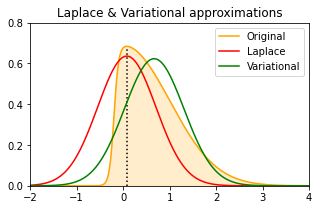

In [13]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.cla()
ax.plot(z,pzn,color="orange")
ax.fill_between(z,pzn, 0,
                 facecolor="orange", # The fill color
                 color='orange',       # The outline color
                 alpha=0.2)          # Transparency of the fill
#ax.axvline(x=z0)#,ylim=0,ymax=0.7)
ax.vlines(z0, ymin=0, ymax=p_z0,linestyles='dotted')
ax.plot(z,q_z_laplace,'r')
ax.plot(z,q_z_va,'g')
ax.set_xlim([-2,4]);
ax.set_ylim([0,0.8]);
ax.set_yticks([0,0.2,0.4,0.6,0.8]);
ax.legend(['Original','Laplace','Variational'])
ax.set_title('Laplace & Variational approximations');

## References
1. Bishop, Christopher M. 2006. Pattern Recognition and Machine Learning. Springer.